<a href="https://colab.research.google.com/github/Trexroy1010/research/blob/main/sentiment_of_steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DATASET AND DATASET INFO**

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/steam_sentiment/second_all_reviews.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730945 entries, 0 to 730944
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   appid                    730945 non-null  int64  
 1   review                   730945 non-null  object 
 2   word_count               730945 non-null  int64  
 3   voted_up                 730945 non-null  bool   
 4   votes_up                 730945 non-null  int64  
 5   votes_funny              730945 non-null  int64  
 6   timestamp_created        730945 non-null  int64  
 7   author_playtime_forever  730945 non-null  int64  
 8   name                     730945 non-null  object 
 9   price                    730945 non-null  int64  
 10  release_date             0 non-null       float64
dtypes: bool(1), float64(1), int64(7), object(2)
memory usage: 56.5+ MB


In [ ]:
df.head()

,appid,review,word_count,voted_up,votes_up,votes_funny,timestamp_created,author_playtime_forever,name,price,release_date
0,1938090,I really loved the game but itll take you a lo...,26,True,0,0,1757864825,1485,Call of Duty: Modern Warfare II,6999,NaN
1,1938090,i cant join the game for some reason,8,False,0,0,1757864289,346,Call of Duty: Modern Warfare II,6999,NaN
2,1938090,these new games are just living in the MASSIVE...,133,False,0,0,1757861908,2131,Call of Duty: Modern Warfare II,6999,NaN
3,1938090,Its fun of course you have cheaters but beside...,25,True,0,0,1757854957,344,Call of Duty: Modern Warfare II,6999,NaN
4,1938090,I play this game as a casual player on PC. I h...,39,False,0,1,1757846859,1746,Call of Duty: Modern Warfare II,6999,NaN


#**CLEAN TEXT DATA AND STORE IN ANOTHER CSV**

In [ ]:
# import re
# import nltk
# from nltk.corpus import stopwords

# nltk.download("stopwords")
# stop_words = set(stopwords.words("english"))

# def clean_text(text):
#     text = text.lower()
#     text = re.sub(r"[^a-zA-Z\s]", "", text)   # remove non-letters
#     words = [w for w in text.split() if w not in stop_words and len(w) > 2]
#     return " ".join(words)

# df["clean_review"] = df["review"].dropna().apply(clean_text)

In [ ]:
# df.head()

In [ ]:
# print(df["word_count"].mean())
# print(df["word_count"].max())
# print(df["word_count"].min())

In [ ]:
# # ---------- CONFIG ----------
# INPUT_FILE = "/content/drive/MyDrive/steam_sentiment/second_all_reviews.csv"
# OUTPUT_FILE = "/content/drive/MyDrive/steam_sentiment/cleaned_all_reviews.csv"

# # ---------- LOAD DATA ----------
# df = pd.read_csv(INPUT_FILE)

# # ---------- CLEANING ----------
# # Drop unnecessary columns
# drop_columns = ["release_date", "votes_up", "votes_funny", "timestamp_created"]
# df = df.drop(columns=[col for col in drop_columns if col in df.columns])

# # Fix price (divide cents by 100 → dollars)
# if "price" in df.columns:
#     df["price"] = df["price"] / 100

# # ---------- SAVE CLEAN FILE ----------
# df.to_csv(OUTPUT_FILE, index=False)

# print(f"✅ Cleaned dataset saved to {OUTPUT_FILE}")


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/steam_sentiment/cleaned_all_reviews.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730945 entries, 0 to 730944
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   appid                       730945 non-null  int64  
 1   review                      730945 non-null  object 
 2   word_count                  730945 non-null  int64  
 3   voted_up                    730945 non-null  bool   
 4   author_playtime_forever     730945 non-null  int64  
 5   name                        730945 non-null  object 
 6   price                       730945 non-null  float64
 7   clean_review                726486 non-null  object 
 8   price_section               730945 non-null  object 
 9   clean_review_sentiment      730945 non-null  object 
 10  clean_review_sentiment_num  730945 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 56.5+ MB


In [ ]:
df.head()

,appid,review,word_count,voted_up,author_playtime_forever,name,price,clean_review,price_section,clean_review_sentiment,clean_review_sentiment_num
0,1938090,I really loved the game but itll take you a lo...,26,True,1485,Call of Duty: Modern Warfare II,69.99,really loved game itll take long time learn ta...,HIGH,5 stars,5
1,1938090,i cant join the game for some reason,8,False,346,Call of Duty: Modern Warfare II,69.99,cant join game reason,HIGH,5 stars,5
2,1938090,these new games are just living in the MASSIVE...,133,False,2131,Call of Duty: Modern Warfare II,69.99,new games living massive shadow black ops revi...,HIGH,1 star,1
3,1938090,Its fun of course you have cheaters but beside...,25,True,344,Call of Duty: Modern Warfare II,69.99,fun course cheaters besides game ment fun even...,HIGH,4 stars,4
4,1938090,I play this game as a casual player on PC. I h...,39,False,1746,Call of Duty: Modern Warfare II,69.99,play game casual player mods hack shadow banne...,HIGH,1 star,1


In [ ]:
# import re
# import nltk
# from nltk.corpus import stopwords

# nltk.download("stopwords")
# stop_words = set(stopwords.words("english"))

# def clean_text(text):
#     text = text.lower()
#     text = re.sub(r"[^a-zA-Z\s]", "", text)   # remove non-letters
#     words = [w for w in text.split() if w not in stop_words and len(w) > 2]
#     return " ".join(words)

# df["clean_review"] = df["review"].dropna().apply(clean_text)
# df.to_csv("/content/drive/MyDrive/steam_sentiment/cleaned_all_reviews.csv", index = False)

In [ ]:
df.head()

,appid,review,word_count,voted_up,author_playtime_forever,name,price,clean_review,price_section,clean_review_sentiment,clean_review_sentiment_num
0,1938090,I really loved the game but itll take you a lo...,26,True,1485,Call of Duty: Modern Warfare II,69.99,really loved game itll take long time learn ta...,HIGH,5 stars,5
1,1938090,i cant join the game for some reason,8,False,346,Call of Duty: Modern Warfare II,69.99,cant join game reason,HIGH,5 stars,5
2,1938090,these new games are just living in the MASSIVE...,133,False,2131,Call of Duty: Modern Warfare II,69.99,new games living massive shadow black ops revi...,HIGH,1 star,1
3,1938090,Its fun of course you have cheaters but beside...,25,True,344,Call of Duty: Modern Warfare II,69.99,fun course cheaters besides game ment fun even...,HIGH,4 stars,4
4,1938090,I play this game as a casual player on PC. I h...,39,False,1746,Call of Duty: Modern Warfare II,69.99,play game casual player mods hack shadow banne...,HIGH,1 star,1


# **DATA DESCRIPTION**

In [ ]:
bins = [0,20,40,df["price"].max()]
labels = ["LOW", "MIDDLE", "HIGH"]
df["price_section"] = pd.cut(df["price"], bins = bins, labels = labels, include_lowest=True)

In [ ]:
games_per_section = df.groupby("price_section")["appid"].nunique()
print("\n📊 Number of Games in Each Section:")
print(games_per_section)


📊 Number of Games in Each Section:
price_section
LOW       403
MIDDLE    228
HIGH      112
Name: appid, dtype: int64


/tmp/ipython-input-622239980.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_per_section = df.groupby("price_section")["appid"].nunique()


In [ ]:
reviews_per_section = df["price_section"].value_counts().sort_index()
print("\n📝 Number of Reviews in Each Section:")
print(reviews_per_section)


📝 Number of Reviews in Each Section:
price_section
LOW       392139
MIDDLE    227964
HIGH      110842
Name: count, dtype: int64


In [ ]:
avg_words_review = df.groupby("price_section")["word_count"].mean()
print("\n🔤 Avg Word Count in Review Column:")
print(avg_words_review)


🔤 Avg Word Count in Review Column:
price_section
LOW       53.706148
MIDDLE    60.086970
HIGH      63.455883
Name: word_count, dtype: float64


/tmp/ipython-input-4008938690.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_words_review = df.groupby("price_section")["word_count"].mean()


In [ ]:
avg_words_clean = df.groupby("price_section")["clean_review"].apply(lambda x: x.str.split().str.len().mean())
print("\n🔤 Avg Word Count in Clean_Review Column:")
print(avg_words_clean)

/tmp/ipython-input-1244497404.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_words_clean = df.groupby("price_section")["clean_review"].apply(lambda x: x.str.split().str.len().mean())



🔤 Avg Word Count in Clean_Review Column:
price_section
LOW       27.907978
MIDDLE    31.332274
HIGH      32.994183
Name: clean_review, dtype: float64


# **Sentiment analysis**

In [ ]:
# from transformers import pipeline
# classifier = pipeline('sentiment-analysis', model = "nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
# model_name = "nlptown/bert-base-multilingual-uncased-sentiment"


In [ ]:
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [ ]:
# from tqdm import tqdm

In [ ]:
# df['clean_review'] = df['clean_review'].astype(str)
# classifier = pipeline(
#    "sentiment-analysis",
#    model=model,
#    tokenizer=tokenizer,
#    device=0,  # GPU, -1 for CPU
#     truncation=True
# )
# reviews_list = df['clean_review'].astype(str).tolist()
# batch_size = 32
# all_labels = []

# for i in tqdm(range(0, len(reviews_list), batch_size), desc="Sentiment Analysis"):
#     batch = reviews_list[i:i+batch_size]
#     results = classifier(batch, truncation=True)
#     all_labels.extend([r['label'] for r in results])

#     # ✅ Periodic saving every 5000 rows
#     if i % 5000 == 0 and i > 0:
#         temp_df = df.iloc[:len(all_labels)].copy()
#         temp_df['clean_review_sentiment'] = all_labels
#         temp_df['clean_review_sentiment_num'] = temp_df['clean_review_sentiment'].str.extract(r'(\d)').astype(int)
#         temp_df.to_csv("/content/drive/MyDrive/steam_sentiment/cleaned_all_reviews_partial.csv", index=False)
#         print(f"💾 Saved progress at {i} reviews")


# df['clean_review_sentiment'] = all_labels
# df['clean_review_sentiment_num'] = df['clean_review_sentiment'].str.extract(r'(\d)').astype(int)

# df.to_csv("/content/drive/MyDrive/steam_sentiment/cleaned_all_reviews.csv", index=False)

#**ANALYSIS ON LABELED DATA**

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/steam_sentiment/cleaned_all_reviews.csv")

In [ ]:
df2.head()

,appid,review,word_count,voted_up,author_playtime_forever,name,price,clean_review,price_section,clean_review_sentiment,clean_review_sentiment_num
0,1938090,I really loved the game but itll take you a lo...,26,True,1485,Call of Duty: Modern Warfare II,69.99,really loved game itll take long time learn ta...,HIGH,5 stars,5
1,1938090,i cant join the game for some reason,8,False,346,Call of Duty: Modern Warfare II,69.99,cant join game reason,HIGH,5 stars,5
2,1938090,these new games are just living in the MASSIVE...,133,False,2131,Call of Duty: Modern Warfare II,69.99,new games living massive shadow black ops revi...,HIGH,1 star,1
3,1938090,Its fun of course you have cheaters but beside...,25,True,344,Call of Duty: Modern Warfare II,69.99,fun course cheaters besides game ment fun even...,HIGH,4 stars,4
4,1938090,I play this game as a casual player on PC. I h...,39,False,1746,Call of Duty: Modern Warfare II,69.99,play game casual player mods hack shadow banne...,HIGH,1 star,1


In [ ]:
avg_sentiment = df2.groupby('price')['clean_review_sentiment_num'].mean()
print(avg_sentiment)

price
3.99     2.692000
4.99     3.459555
5.99     3.623431
6.99     3.160234
7.99     2.860258
8.99     3.101500
9.99     3.375086
10.99    2.000000
11.99    3.685000
12.99    3.350250
13.99    3.332000
14.99    3.458344
15.99    2.971000
16.99    3.489500
17.99    3.816155
18.99    3.759000
19.88    3.402000
19.99    3.416980
23.99    3.908000
24.99    3.472543
26.99    3.294000
27.99    3.095000
29.99    3.299655
31.96    3.548000
34.99    3.430143
35.00    3.472000
36.99    3.941000
39.99    3.312603
44.99    3.204000
49.99    3.191250
59.99    3.290771
67.95    3.057000
69.99    2.629222
74.99    3.500000
79.99    3.378000
Name: clean_review_sentiment_num, dtype: float64


In [ ]:
avg_sentiment_tier = df2.groupby('price_section')['clean_review_sentiment_num'].mean()
print(avg_sentiment_tier)

price_section
HIGH      3.201061
LOW       3.412221
MIDDLE    3.341041
Name: clean_review_sentiment_num, dtype: float64


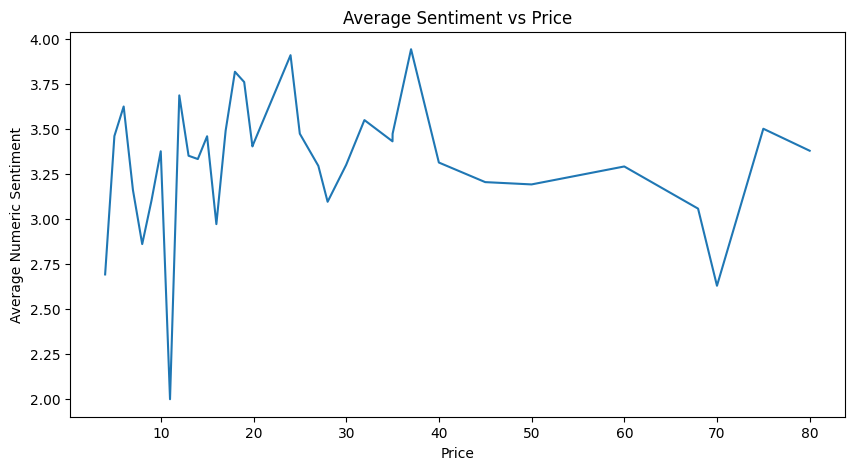

/tmp/ipython-input-754199027.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='price_section', y='clean_review_sentiment_num', data=df2, palette="coolwarm")


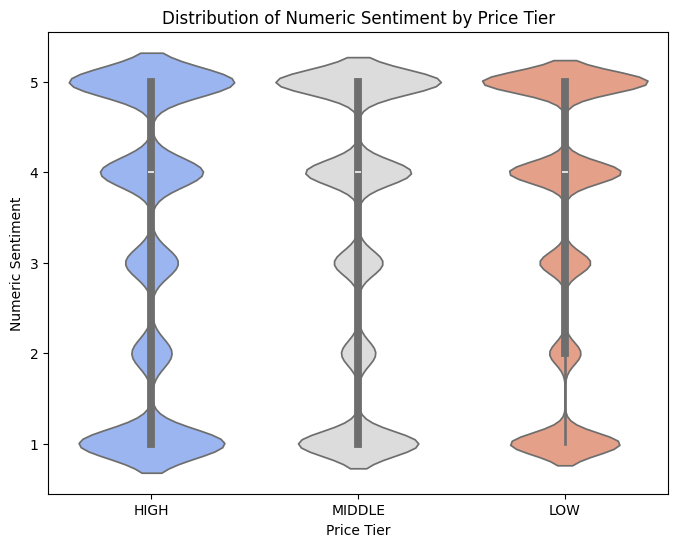

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot
avg_sentiment_price = df2.groupby('price')['clean_review_sentiment_num'].mean()
plt.figure(figsize=(10,5))
plt.plot(avg_sentiment_price.index, avg_sentiment_price.values)
plt.xlabel("Price")
plt.ylabel("Average Numeric Sentiment")
plt.title("Average Sentiment vs Price")
plt.show()

# Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='price_section', y='clean_review_sentiment_num', data=df2, palette="coolwarm")
plt.title("Distribution of Numeric Sentiment by Price Tier")
plt.ylabel("Numeric Sentiment")
plt.xlabel("Price Tier")
plt.show()

#**OLS MODEL**

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(df2['price'])
y = df2['clean_review_sentiment_num']
model = sm.OLS(y, X).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     clean_review_sentiment_num   R-squared:                       0.002
Model:                                    OLS   Adj. R-squared:                  0.002
Method:                         Least Squares   F-statistic:                     1467.
Date:                        Tue, 21 Oct 2025   Prob (F-statistic):          1.31e-320
Time:                                16:31:01   Log-Likelihood:            -1.3788e+06
No. Observations:                      730945   AIC:                         2.758e+06
Df Residuals:                          730943   BIC:                         2.758e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
df2.groupby("price_section")["price"].agg(["min", "max"])


,min,max
price_section,,
HIGH,44.99,79.99
LOW,3.99,19.99
MIDDLE,23.99,39.99


In [ ]:
df2.groupby("price_section")["clean_review"].count()


,clean_review
price_section,
HIGH,110374
LOW,389471
MIDDLE,226641


#**DISTRIBUTE REVIEWS IN 3 SECTIONS**

In [ ]:
min_size = df2.groupby("price_section")["clean_review"].count().min()

reviews_low  = df2[df2['price_section']=="LOW"]['clean_review'].dropna().sample(min_size, random_state=42)
reviews_mid  = df2[df2['price_section']=="MIDDLE"]['clean_review'].dropna().sample(min_size, random_state=42)
reviews_high = df2[df2['price_section']=="HIGH"]['clean_review'].dropna().sample(min_size, random_state=42)


In [ ]:
# !pip install bertopic


In [ ]:
# from bertopic import BERTopic
# from sentence_transformers import SentenceTransformer


In [ ]:
# embedding_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

In [ ]:
# def train_topic_model(reviews, label):
#   topic_model = BERTopic(embedding_model=embedding_model,min_topic_size=200, verbose =True)
#   topics , probs = topic_model.fit_transform(reviews.tolist())
#   print(f"Top topics for {label} games : ")
#   print(topic_model.get_topic_info().head())
#   return topic_model, topics, probs

# model_low, topic_low, _ = train_topic_model(reviews_low, "LOW PRICE")
# model_mid, topic_mid, _ = train_topic_model(reviews_mid, "MID PRICE")
# model_high, topic_high, _ = train_topic_model(reviews_high, "HIGH PRICEE")

#**TOPIC ANALYSIS**


In [ ]:
categories = {
    "graphics": ["graphics", "visuals", "art style", "animation", "fps", "frame rate", "resolution", "texture", "lighting"],
    "gameplay": ["gameplay", "mechanics", "combat", "controls", "movement", "boss fight", "jumping", "exploration", "fighting"],
    "story": ["story", "plot", "narrative", "dialogue", "ending", "cutscene", "character", "writing", "lore"],
    "microtransactions": ["microtransaction", "pay to win", "p2w", "dlc", "lootbox", "mtx", "season pass", "cash grab"],
    "balance": ["balance", "nerf", "buff", "op", "broken", "difficulty", "challenging", "unfair", "grind"],
    "bugs_performance": ["bug", "glitch", "crash", "lag", "stutter", "fps drop", "optimize", "performance", "freeze"],
    "multiplayer": ["multiplayer", "coop", "co-op", "online", "server", "matchmaking", "team", "pvp"],
    "audio_music": ["soundtrack", "music", "audio", "voice acting", "sound effect", "voices"],
    "value_money": ["price", "worth", "value", "expensive", "cheap", "overpriced", "sale", "refund"],
    "progression": ["leveling", "xp", "progression", "skills", "abilities", "talents", "perk tree", "upgrade"],
    "community": ["community", "mods", "steam workshop", "player base", "toxic", "friendly"],
    "immersion": ["immersion", "atmosphere", "world", "environment", "realistic", "roleplay"],
}


import re
from collections import defaultdict

def categorize_review(review):
    review = review.lower()
    hits = []
    for cat, words in categories.items():
        if any(re.search(rf"\b{w}\b", review) for w in words):
            hits.append(cat)
    return hits

df2["categories"] = df2["clean_review"].dropna().apply(categorize_review)



In [ ]:
df2.explode("categories")["categories"].value_counts()


,count
categories,
gameplay,120355
story,119559
value_money,72386
graphics,60833
immersion,52107
multiplayer,46251
balance,42261
audio_music,35445
community,29021


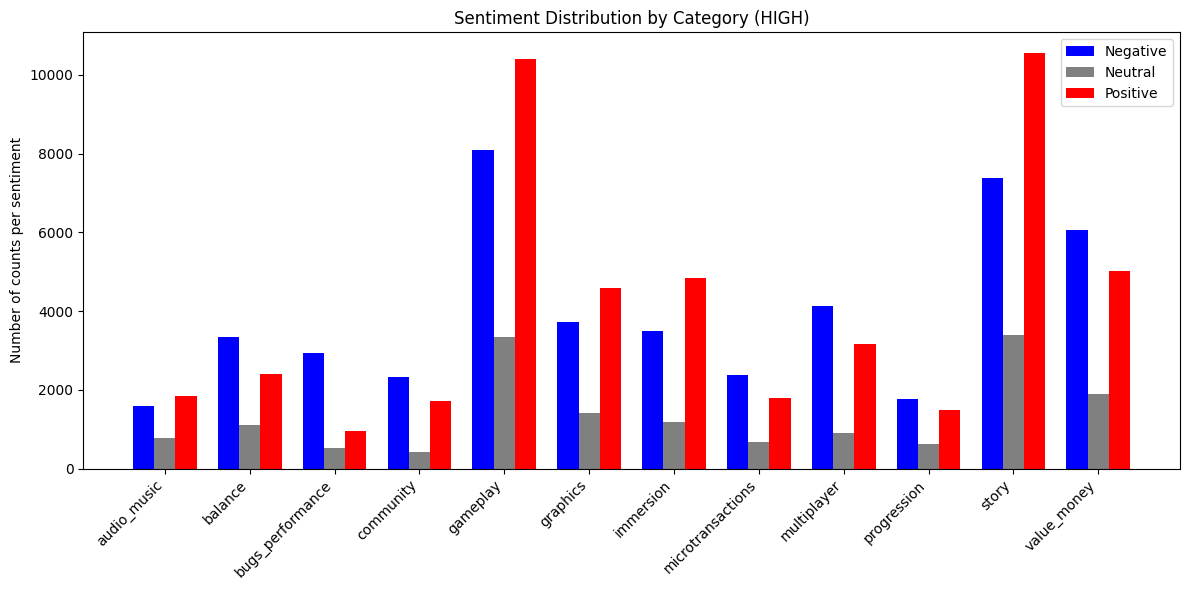

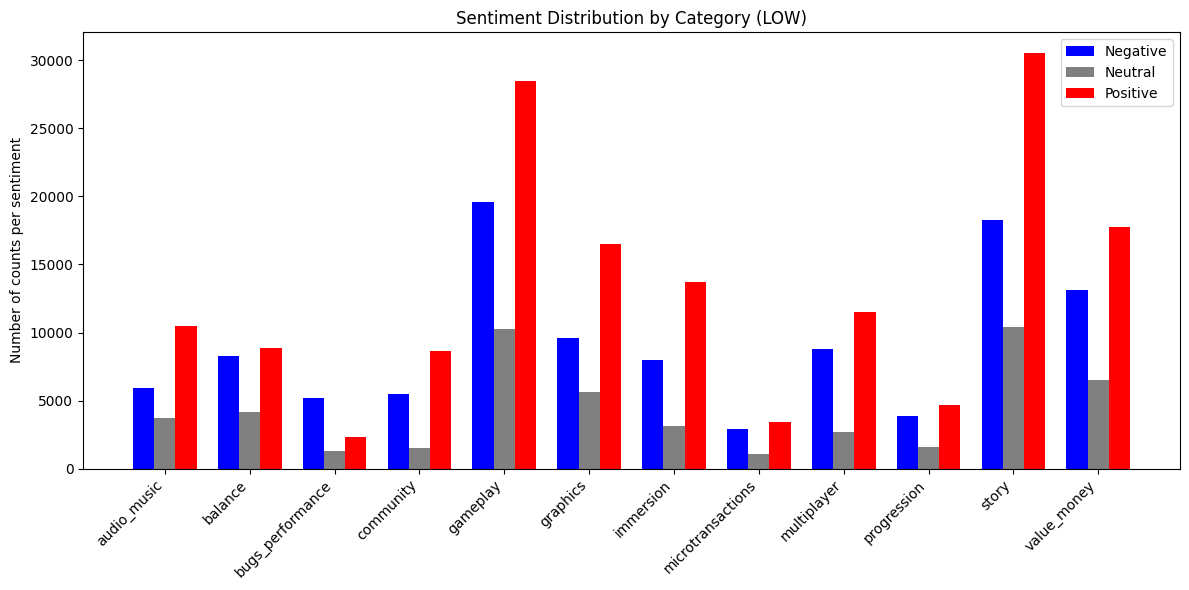

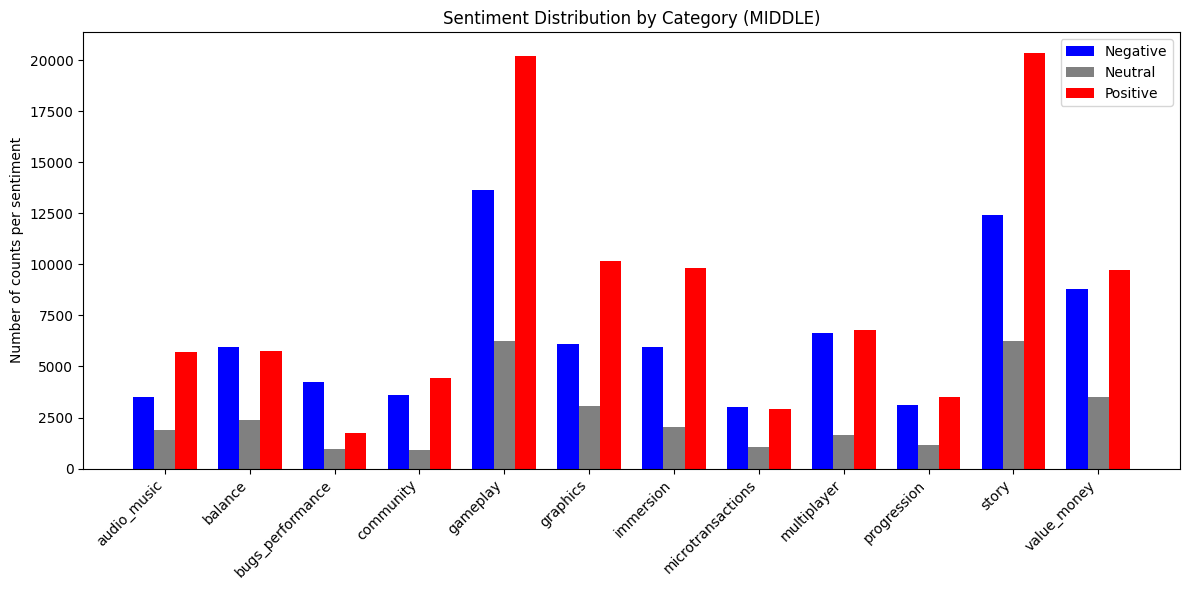

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot grouped bars for each price section
for section in category_sentiment_counts["price_section"].unique():
    subset = category_sentiment_counts[category_sentiment_counts["price_section"] == section]

    # Index = categories, columns = sentiment counts
    subset_plot = subset.set_index("categories")[["negative", "neutral", "positive"]]

    # --- Grouped bar plot setup ---
    categories = subset_plot.index
    x = np.arange(len(categories))  # positions for categories
    bar_width = 0.25

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.bar(x - bar_width, subset_plot["negative"], width=bar_width, label="Negative", color="blue")
    ax.bar(x, subset_plot["neutral"], width=bar_width, label="Neutral", color="grey")
    ax.bar(x + bar_width, subset_plot["positive"], width=bar_width, label="Positive", color="red")

    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha="right")
    ax.set_ylabel("Number of counts per sentiment")
    ax.set_title(f"Sentiment Distribution by Category ({section})")
    ax.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
df_exploded = df2.explode("categories")
category_price = df_exploded.groupby(["price_section", "categories"]).size().unstack().fillna(0)


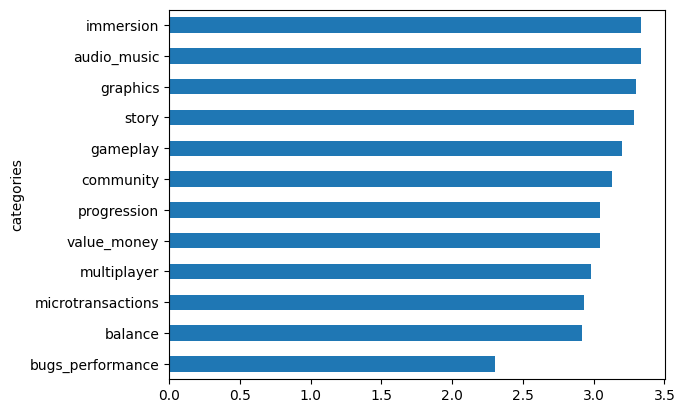

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_exploded.groupby("categories")["clean_review_sentiment_num"].mean().sort_values().plot(kind="barh")
plt.show()

In [ ]:
df_exploded = df2.explode("categories").dropna(subset=['categories'])
category_price_counts = df_exploded.groupby(["price_section", "categories"]).size().unstack(fill_value=0)
most_talked_about_category = category_price_counts.idxmax(axis=1)


In [ ]:
print("\nMost talked about topic in each price segment:")
print(most_talked_about_category)
print("\n--- Detailed Counts ---")
print(category_price_counts)


Most talked about topic in each price segment:
price_section
HIGH      gameplay
LOW          story
MIDDLE    gameplay
dtype: object

--- Detailed Counts ---
categories     audio_music  balance  bugs_performance  community  gameplay  \
price_section                                                                
HIGH                  4218     6828              4418       4457     21842   
LOW                  20103    21346              8707      15647     58358   
MIDDLE               11124    14087              6902       8917     40155   

categories     graphics  immersion  microtransactions  multiplayer  \
price_section                                                        
HIGH               9719       9499               4850         8218   
LOW               31785      24793               7371        22978   
MIDDLE            19329      17815               6990        15055   

categories     progression  story  value_money  
price_section                                   
HI

In [ ]:
print("\n--- Detailed Counts ---")
print(category_price_counts)


--- Detailed Counts ---
categories     audio_music  balance  bugs_performance  community  gameplay  \
price_section                                                                
HIGH                  4218     6828              4418       4457     21842   
LOW                  20103    21346              8707      15647     58358   
MIDDLE               11124    14087              6902       8917     40155   

categories     graphics  immersion  microtransactions  multiplayer  \
price_section                                                        
HIGH               9719       9499               4850         8218   
LOW               31785      24793               7371        22978   
MIDDLE            19329      17815               6990        15055   

categories     progression  story  value_money  
price_section                                   
HIGH                  3874  21342        12967  
LOW                  10136  59221        37407  
MIDDLE                7770  38996    

In [ ]:
exploded = df2.explode("categories")[["categories", "clean_review_sentiment_num"]].dropna()


In [ ]:
category_stats = exploded.groupby("categories").agg(
    count=("clean_review_sentiment_num", "size"),
    avg_sentiment=("clean_review_sentiment_num", "mean")
).reset_index()


In [ ]:
def sentiment_label(x):
    if x in [4, 5]:
        return "Positive"
    elif x == 3:
        return "Neutral"
    elif x in [1, 2]:
        return "Negative"

df2["sentiment_label"] = df2["clean_review_sentiment_num"].map(sentiment_label)


In [ ]:
exploded = df2.explode("categories")[["categories", "sentiment_label"]].dropna()


In [ ]:
sentiment_counts = (
    exploded.groupby(["categories", "sentiment_label"])
    .size()
    .reset_index(name="count")
)


In [ ]:
sentiment_pivot = sentiment_counts.pivot_table(
    index="categories", columns="sentiment_label", values="count", fill_value=0
)

# Convert to percentage
sentiment_pivot = sentiment_pivot.div(sentiment_pivot.sum(axis=1), axis=0) * 100


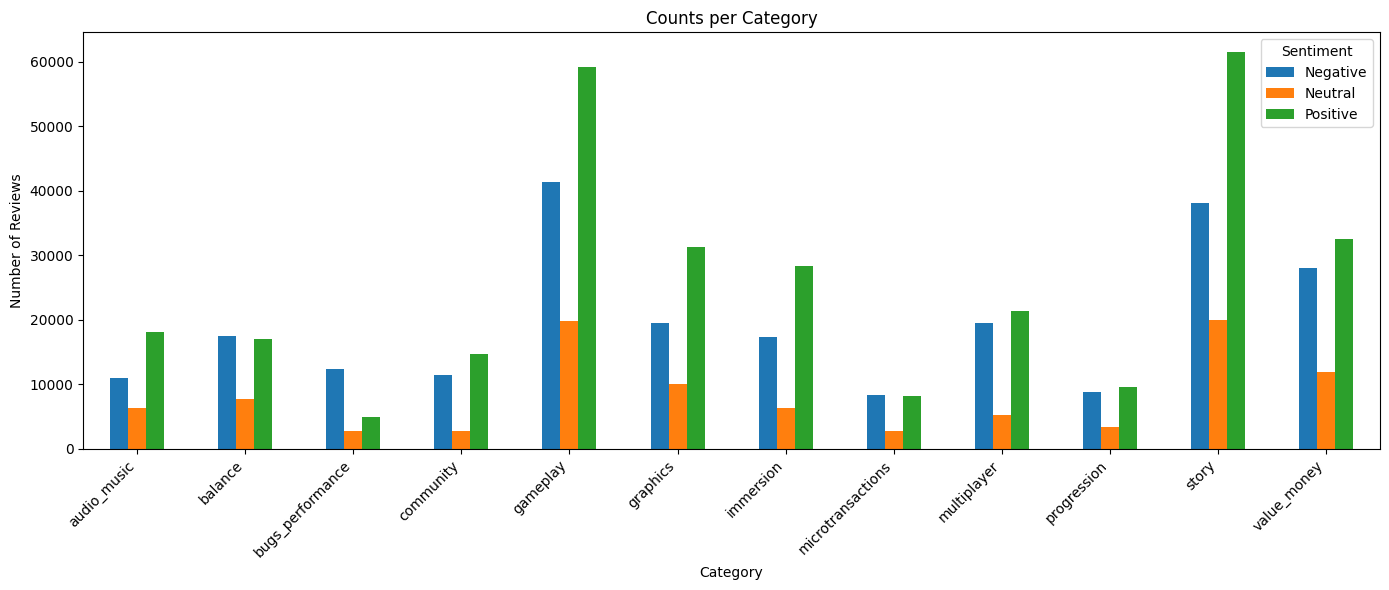

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Prepare pivot (counts, not percentages unless you want percentages)
sentiment_pivot = sentiment_counts.pivot_table(
    index="categories", columns="sentiment_label", values="count", fill_value=0
).reset_index()

# Step 2: Plot grouped bars
sentiment_pivot.plot(
    x="categories",
    kind="bar",
    figsize=(14,6)
)

plt.title("Counts per Category")
plt.ylabel("Number of Reviews")
plt.xlabel("Category")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


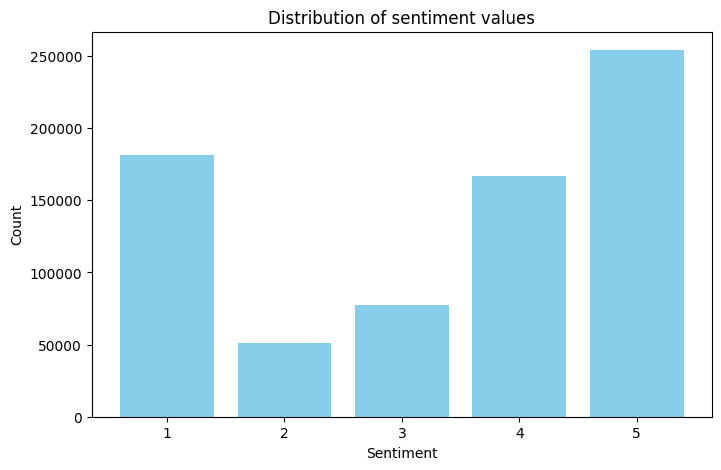

In [ ]:
sentiment_counts = df2['clean_review_sentiment_num'].value_counts().sort_index()

# Using matplotlib
plt.figure(figsize=(8,5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of sentiment values")
plt.xticks([1,2,3,4,5])
plt.show()

In [ ]:
def map_sentiment(score):
    if score in [4, 5]:
        return "positive"
    elif score == 3:
        return "neutral"
    else:
        return "negative"

df2["sentiment_label"] = df2["clean_review_sentiment_num"].map(map_sentiment)


In [ ]:
df_exploded = df2.explode("categories").dropna(subset=["categories"])


In [ ]:
category_sentiment_counts = (
    df_exploded
    .groupby(["price_section", "categories", "sentiment_label"])
    .size()
    .unstack(fill_value=0)   # gives separate columns for positive/neutral/negative
    .reset_index()
)


In [ ]:
category_sentiment_counts

sentiment_label,price_section,categories,negative,neutral,positive
0,HIGH,audio_music,1587,778,1853
1,HIGH,balance,3334,1102,2392
2,HIGH,bugs_performance,2946,518,954
3,HIGH,community,2320,417,1720
4,HIGH,gameplay,8103,3340,10399
5,HIGH,graphics,3717,1411,4591
6,HIGH,immersion,3483,1180,4836
7,HIGH,microtransactions,2388,663,1799
8,HIGH,multiplayer,4136,914,3168
9,HIGH,progression,1763,615,1496


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730945 entries, 0 to 730944
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   appid                       730945 non-null  int64  
 1   review                      730945 non-null  object 
 2   word_count                  730945 non-null  int64  
 3   voted_up                    730945 non-null  bool   
 4   author_playtime_forever     730945 non-null  int64  
 5   name                        730945 non-null  object 
 6   price                       730945 non-null  float64
 7   clean_review                726486 non-null  object 
 8   price_section               730945 non-null  object 
 9   clean_review_sentiment      730945 non-null  object 
 10  clean_review_sentiment_num  730945 non-null  int64  
 11  categories                  726486 non-null  object 
 12  sentiment_label             730945 non-null  object 
dtypes: bool(1), fl

/tmp/ipython-input-1252693079.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="Blues_r")


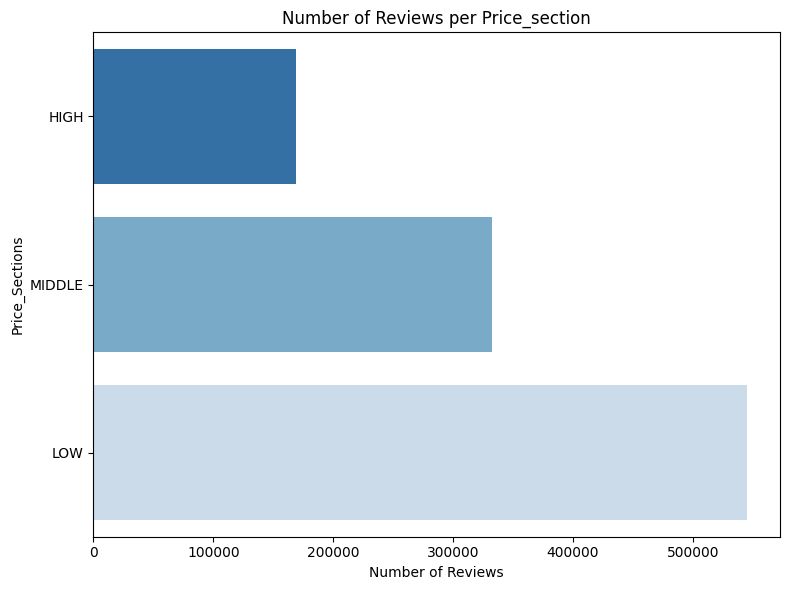

In [ ]:
# Explode the 'categories' column
df_exploded = df2.explode("categories")

# Now group by single category values
category_counts = df_exploded.groupby("price_section")["clean_review"].count().sort_values()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="Blues_r")
plt.xlabel("Number of Reviews")
plt.ylabel("Price_Sections")
plt.title("Number of Reviews per Price_section")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2673930682.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="Blues_r")


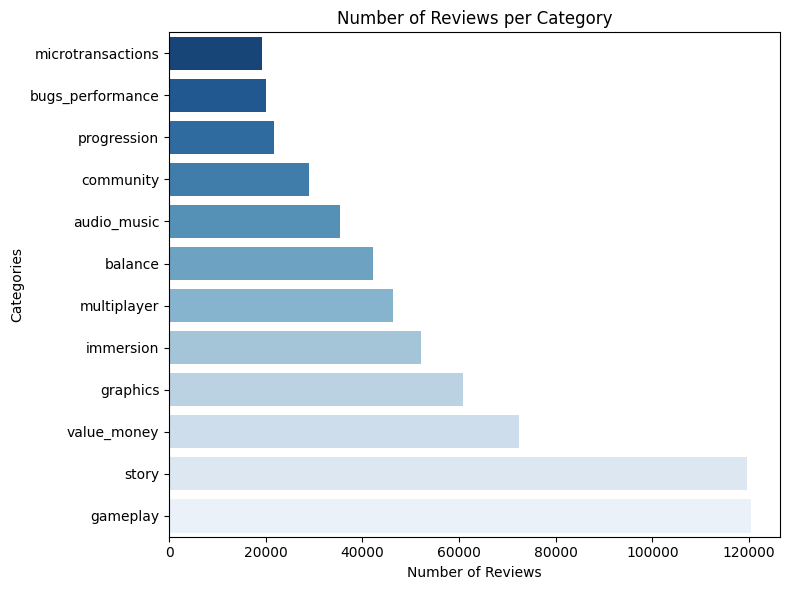

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of reviews per category
category_counts = df_exploded.groupby("categories")["clean_review"].count().sort_values()
plt.figure(figsize=(8,6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="Blues_r")
plt.xlabel("Number of Reviews")
plt.ylabel("Categories")
plt.title("Number of Reviews per Category")
plt.tight_layout()
plt.show()